In [174]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import datetime

In [2]:
def load_data():
    dataMat = []
    dataLabel = []
    
    #按空格分开
    file = pd.read_csv("dataSet.txt", header=None, sep="\s+")
    b = np.ones((len(file),1))
    dataMat = np.hstack((b, np.array(file[[0,1]])))
    dataLabel = np.array(file[[2]])
    #111
    return dataMat, dataLabel

In [3]:
def sigmoid(inX):
    si = []
    for i in range(len(inX)):
        k = 1.0 / (1+math.exp(-inX[i]))
        si.append(k)
    return si

In [194]:
def gradAscent(dataMat, dataLabel):
    '''
    计算梯度上升
    '''
    start_time = datetime.datetime.now()
    #转换为矩阵形式
    dataMat = np.mat(dataMat)
    #为什么要转制？？
    dataLabel = np.mat(dataLabel).transpose()
    #步长
    alpha = 0.01
    
    #迭代的次数
    cishu = 500
    
    m,n = dataMat.shape
    #初始化权重
    weight = np.mat(np.ones((n, 1)))
    
    for i in range(cishu):
        h = dataMat * weight    #(100, 3)*(3, 1) = 100*1
        h = np.mat(sigmoid(h))
#         print(h.shape)  #1,100
        #转制
#         print(dataMat.shape)
#         print(dataLabel.shape)
#         print(h.shape)  
        
        #计算error
        error = (dataLabel - h)
        #梯度更新权重
        weight = weight + alpha*dataMat.transpose()*error.transpose()        #(3, 100)(1, 100)
    end_time = datetime.datetime.now()
    
    print("运行时间是:"+np.str(end_time-start_time))
    
    return weight 

In [195]:
#画图
def plotBestfit():
    '''
    参数为权重
    '''
    dataMat, dataLabel = load_data()
    weight = gradAscent(dataMat, dataLabel)
#     print(weight.shape)  #(3, 1)
#     print(type(weight))
    
    #将list转换为array
    dataMat = np.array(dataMat)
    xcoord1 = []
    ycoord1 = []
    xcoord2 = []
    ycoord2 = []
    
    data_len = len(dataMat)
    for i in range(data_len):
        if(dataLabel[i] == 1):
            xcoord1.append(dataMat[i, 1])
            ycoord1.append(dataMat[i, 2])
        if(dataLabel[i] == 0):
            xcoord2.append(dataMat[i, 1])
            ycoord2.append(dataMat[i, 2])
            
    #画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcoord1, ycoord1, s=30, c='red', marker='s')
    ax.scatter(xcoord2, ycoord2, s=30, c='green')
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = np.array((-weight[0] - weight[1]*x)/weight[2])[0]
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

运行时间是:0:00:00.351058


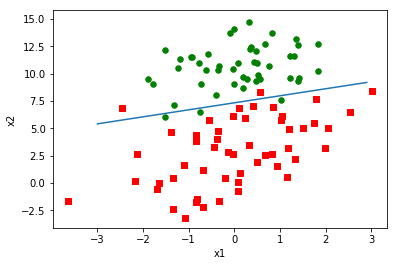

In [196]:
plotBestfit()

In [185]:
def random_gradAcent(dataMat, dataLabel):
    '''
    随机梯度上升
    '''
    start_time = datetime.datetime.now()
    #n, m分别为行和列
    n, m = dataMat.shape
    
    alpha = 0.01
    
    weight = np.ones(m)   #这里不用（M,1）?
    
    #改变部分有两个，第一是迭代的次数，第二是迭代的部分，每次更新只更新dataMat的一行
    
    #这里只循环n次，上面的函数循环500次
    for i in range(n):
        #上面是直接dataMat*weight更新整个数据集
        #so这里用dataMat[i]部分进行权值的更新
        h = dataMat[i] *weight  #(3)
        h = sigmoid(h)
        
        error = (dataLabel[i] - h)
    
        weight = weight + alpha*dataMat[i]*error   
        
    end_time = datetime.datetime.now()
    print("运行时间是："+np.str(end_time-start_time))
    return weight

In [186]:
#画图2
def plotBestfit2():
    '''
    参数为权重
    '''
    dataMat, dataLabel = load_data()
    gradAscent(dataMat, dataLabel)
    weight = random_gradAcent(dataMat, dataLabel)
    #将list转换为array
    dataMat = np.array(dataMat)
    xcoord1 = []
    ycoord1 = []
    xcoord2 = []
    ycoord2 = []
    
    data_len = len(dataMat)
    for i in range(data_len):
        if(dataLabel[i] == 1):
            xcoord1.append(dataMat[i, 1])
            ycoord1.append(dataMat[i, 2])
        if(dataLabel[i] == 0):
            xcoord2.append(dataMat[i, 1])
            ycoord2.append(dataMat[i, 2])
            
    #画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcoord1, ycoord1, s=30, c='red', marker='s')
    ax.scatter(xcoord2, ycoord2, s=30, c='green')
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weight[0] - weight[1]*x)/weight[2]
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

运行时间是：0:00:00.001969


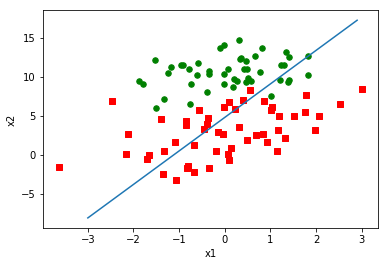

In [187]:
plotBestfit2()

In [197]:
def random_gradAcent2(dataMat, dataLabel, cishu=150):
    '''
    cishu指迭代的次数
    '''
    #计算时间
    start_time = datetime.datetime.now()
    
    n, m = dataMat.shape
    weight = np.ones(m)
    
    for i in range(cishu):
        for j in range(n):
            #步长改变
            alpha = 4/(1.0+i+j) + 0.1
            #随机获取样本
            get_index = int(random.uniform(0,len(dataMat)))
#             print(np.mat(dataMat[get_index]).shape)
#             print(np.mat(weight).transpose().shape)
            h = np.mat(dataMat[get_index]) * np.mat(weight).transpose()   #1*3 3*1
            h = np.mat(sigmoid(h))   #1*1
            error = dataLabel[get_index] - h
            weight = weight + alpha*error.transpose()*(np.mat(dataMat[get_index]))
            np.delete(np.array(dataMat), get_index, 0)   #删除出现过的样本
    end_time  = datetime.datetime.now()
    s_e_time = end_time - start_time
    print("运行时间是："+np.str(s_e_time))
    return weight

In [198]:
#画图2
def plotBestfit3():
    '''
    参数为权重
    '''
    
    dataMat, dataLabel = load_data()
    weight = random_gradAcent2(dataMat, dataLabel)
    #将list转换为array
    dataMat = np.array(dataMat)
    xcoord1 = []
    ycoord1 = []
    xcoord2 = []
    ycoord2 = []
    
    data_len = len(dataMat)
    for i in range(data_len):
        if(dataLabel[i] == 1):
            xcoord1.append(dataMat[i, 1])
            ycoord1.append(dataMat[i, 2])
        if(dataLabel[i] == 0):
            xcoord2.append(dataMat[i, 1])
            ycoord2.append(dataMat[i, 2])
            
    #画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcoord1, ycoord1, s=30, c='red', marker='s')
    ax.scatter(xcoord2, ycoord2, s=30, c='green')
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-np.array(weight)[0][0] - np.array(weight)[0][1]*x)/np.array(weight)[0][2]
    ax.plot(x, y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

运行时间是：0:00:01.369358


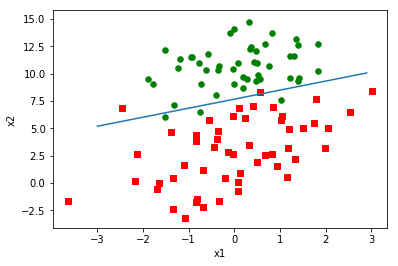

In [199]:
plotBestfit3()